In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

this image is type <class 'numpy.ndarray'> with dimensions (720, 1280, 3)


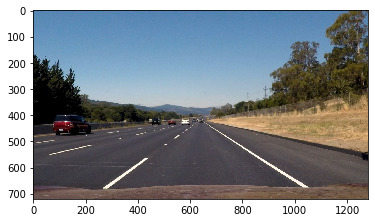

In [55]:
#read an image an print out traces
main_image= mpimg.imread('test.jpg')
print('this image is type', type(main_image), 'with dimensions',main_image.shape)
plt.imshow(main_image)

### COLOR SELECTION 

720 1280


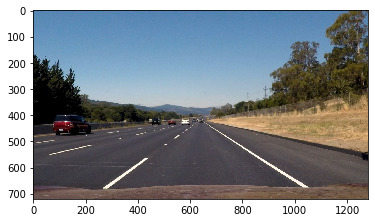

In [56]:
#Grab the X and Y size and make a copy of the image 
#NOte : Creating copy of arrays, ndarrays ,other variables etc is always a good practice to use further instead of usinh "="
y_size= main_image.shape[0]
x_size=main_image.shape[1]
print(y_size,x_size)

first_comp_image= np.copy(main_image)
plt.imshow(first_comp_image)

In [57]:
#Defining the color selection criteria
#Creating threashold values in fo red , green and blue and populating in rgb_threshold
#We can tweak the threshold values for better results 
red_th=200
green_th=200
blue_th=200
rgb_th=[red_th,green_th,blue_th]

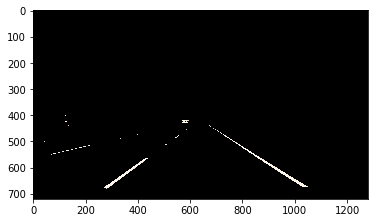

In [60]:
#Pick any pixel below the threshold and set it to zero
#All pixels that meet the color criteria(those above the threshold) will be retained 
#and those do not (below the threshold) will be blacked out 
thresholds = (image[:,:,0] < rgb_th[0]) | (image[:,:,1] < rgb_th[1]) | (image[:,:,2] < rgb_th[2])
first_comp_image[thresholds] = [0,0,0]

# Display the image                 
plt.imshow(first_comp_image)
plt.show()

### REGION SELECTION 

In [61]:
# #In order to filter or mask out anything that lies out of scope of vision we create a traingular vision shape now 
#It can be a quadrilatral or polygon 
left_bottom= [0,715]
right_bottom= [1200,700]
apex= [600,300]

In [62]:
#Fit lines (Y=Ax+B) to identify the 3 sided region of interest by using np.polyfit()
fit_left=np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right=np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom= np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

In [64]:
#find the region inside the lane
XX,YY= np.meshgrid(np.arange(0, x_size), np.arange(0, y_size))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & (YY > (XX*fit_right[0] + fit_right[1])) & (YY < (XX*fit_bottom[0] + fit_bottom[1]))

second_comp_image=np.copy(first_comp_image)
second_comp_image[region_thresholds]=[0,255,0]


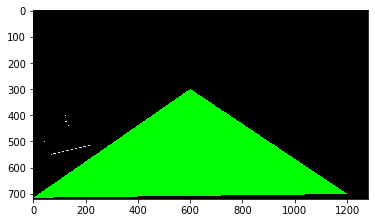

In [65]:
plt.imshow(second_comp_image)

In [67]:
#Combining region masking and color selection for coloring road scripts
marking_result_image=np.copy(main_image)

#Mask color selction 
second_comp_image[thresholds | ~region_thresholds]=[0,0,0]
# Find where image is both colored right and in the region
marking_result_image[~thresholds & region_thresholds] = [0,255,0]

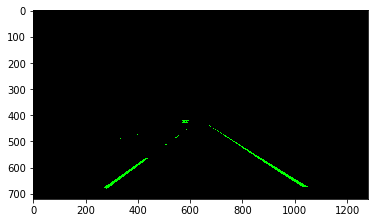

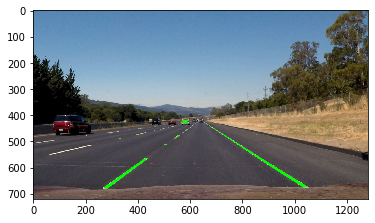

In [77]:
# Display our two output images
plt.imshow(second_comp_image)
plt.show()


plt.imshow(marking_result_image)
plt.show()
# # Display the image and show region and color selections
# plt.imshow(main_image)
# x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
# y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
# plt.plot(x, y, 'b--', lw=4)
# plt.imshow(second_comp_image)
# plt.imshow(marking_result_image)

#### Disadvantages 

Lane Lines are not always of the same color and even not same under different lighting conditions(day,night,etc) so they may fail to be detetected by this simple technique. We need to use advanced computer vision technqiues 